In [1]:
import tonic
import tonic.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

c:\Users\mahia\miniconda3\envs\thesis\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Frame tensor shape: (60, 2, 128, 128)
Min/Max: 0 36


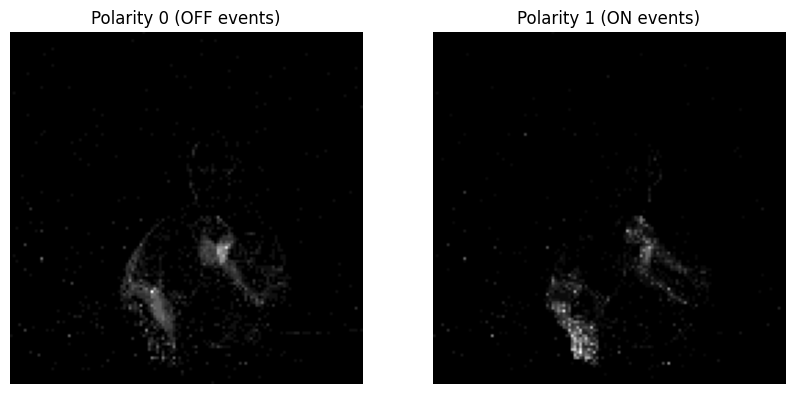

In [3]:
N_FRAMES = 60
frame_transform = transforms.ToFrame(
    sensor_size=tonic.datasets.DVSGesture.sensor_size,
    n_time_bins=N_FRAMES
)

dataset = tonic.datasets.DVSGesture(save_to='../newdata', train=True, transform=frame_transform)

# Find any AIR DRUMS sample (class index 8)
target_class = 8

for i in range(len(dataset)):
    frames, label = dataset[i]
    if label == target_class:
        sample = frames     # shape (2, 60, 128, 128)
        break

print("Frame tensor shape:", sample.shape)
print("Min/Max:", sample.min(), sample.max())

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(sample[30, 0], cmap='gray')
ax[0].set_title("Polarity 0 (OFF events)")
ax[0].axis('off')

ax[1].imshow(sample[30, 1], cmap='gray')
ax[1].set_title("Polarity 1 (ON events)")
ax[1].axis('off')

plt.show()